# EDA

Explore the classes and images

In [6]:
# imports
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import cv



from tensorflow.keras.utils import image_dataset_from_directory

import numpy as np
np.random.seed(18)

### Functions

In [8]:
def class_sizes(path, x_label, x_ticks_list=None):
    '''
    Visualize the distribution of the classes for disease, inspired by https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a
    Input: 
    path - str, the path to the folder with data
    x_label - str, x-axis for the plot
    x_ticks_list - list, List of the X ticks names
    Output: Bar chart with the distribution of the classes, 
    Returns: Dictionary with names of the classes and sizes
    '''
    # Make a dictionary from folder names and the number of images in each folder
    class_sizes_dict = {}
    for class_name in listdir(path):
        class_sizes_dict[class_name] = len(listdir(f'{path}/{class_name}'))
    # Sort dictionary for nicer looking plot
    class_sizes_dict = dict(sorted(class_sizes_dict.items(), key= lambda x:x[1]))
    # Plot the distribution
    plt.figure(figsize=(12, 8))
    plt.bar(class_sizes_dict.keys(), class_sizes_dict.values(), width = .8, color = 'rebeccapurple')
    plt.title("Number of Images by Class", size = 20)
    plt.xlabel(x_label, size = 20)
    if x_ticks_list:
        plt.xticks(np.arange(4), x_ticks_list, size = 15)
    plt.ylabel('# Images', size = 20)
    # Save for the presentation
    plt.tight_layout()
    plt.savefig(f'../images/{x_label} classes.jpeg');
    return class_sizes_dict

In [9]:
def im_sizes(path, directory):
    '''
    Data Frame with image sizes in the directory
    Input:
    path - str, the path to the folder with data
    directory - subfolder with images
    Return:
    A data frame with the height and width of the images in the derictory
    '''
    h = []
    w = []
    path = f'{path}/{directory}/'
    for image in listdir(path):
        if '.jpg' in image:
            im_gray = cv2.imread(f'{path}{image}', cv2.IMREAD_GRAYSCALE)
            h.append(im_gray.shape[0]) 
            w.append(im_gray.shape[1])

    df_sizes = pd.DataFrame({'height': h, 'width': w})
    return df_sizes

In [10]:
def all_im_sizes(path_to_dir):
    '''
    Image sizes in all directories of the training data
    Input:
    path_to_dir - str, the path to the folder with data
    Output:
    Mean height and width of the images in all directories of the path
    Return:
    A data frame with the height and width of all images in the path
    '''
    df_all_sizes = pd.DataFrame()
    for directory in listdir(path_to_dir):
        df_dir = im_sizes(path_to_dir, directory)
        df_all_sizes = pd.concat([df_all_sizes, df_dir])
    mean_height = round(df_all_sizes['height'].mean())
    mean_width = round(df_all_sizes['width'].mean())
    print(f'Average height: {mean_height}')
    print(f'Average width: {mean_width}')
    return df_all_sizes

In [28]:
# Show several images from training data
def plot_sample(data):
    '''
    
    '''
    plt.figure(figsize=(10, 10))
    for images, labels in data.take(1):
        for i in range(9):
            label_index = np.argmax(labels[i], axis=-1)
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
            plt.title(data.class_names[label_index])
            plt.axis("off")

In [13]:
# Base line
def normalized_dict(dict_to_norm):
    sum_all = sum(dict_to_norm.values())
    for k,v in dict_to_norm.items():
        dict_to_norm[k] = round(v/sum_all,2)
    return dict_to_norm

---

## Alzheimer's 

In [34]:
# The path to the training set
al_path_train = '../data/alzheimer/train'
al_path_test = '../data/alzheimer/test'

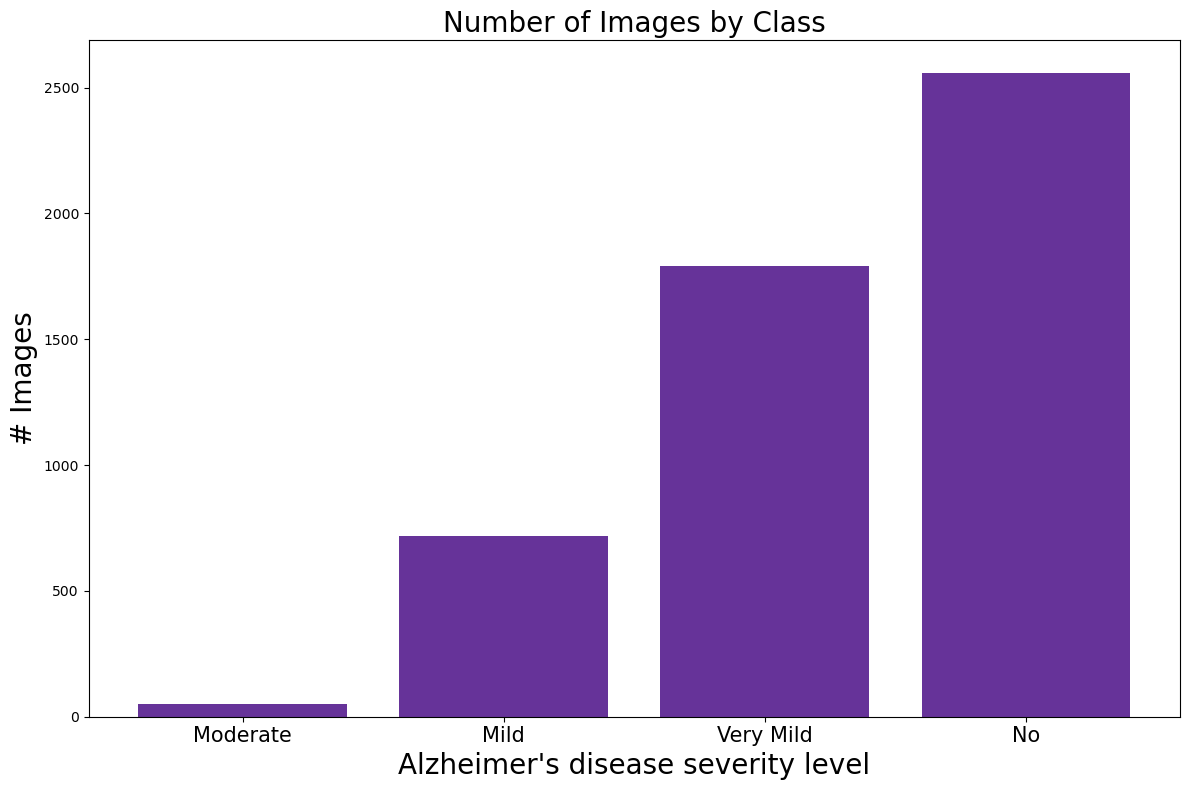

In [15]:
# Make dictionary of the sizes of classes for training data
al_class_sizes = class_sizes(path = al_path_train, 
                             x_label = "Alzheimer's disease severity level",
                             x_ticks_list = ['Moderate', 'Mild', 'Very Mild', 'No'])

The classes are extremely imbalanced. I will need to use resampling to get better results from the model.

In [16]:
# Check image sizes
al_all_sizes = all_im_sizes(al_path_train)
al_all_sizes.head()

Average height: 208
Average width: 176


,height,width
0,208,176
1,208,176
2,208,176
3,208,176
4,208,176


All images for Alzheimer's disease are the same size, It is not too big, I will use it in the TensorFlow data preparetion.

In [37]:
# Baseline for Alzheimer 
normalized_dict(al_class_sizes)

{'ModerateDemented': 0.01,
 'MildDemented': 0.14,
 'VeryMildDemented': 0.35,
 'NonDemented': 0.5}

My Baseline for Alzheimer's disease is 50%

In [36]:
# Check test data
normalized_dict(al_class_sizes_test)

{'ModerateDemented': 0.01,
 'MildDemented': 0.14,
 'VeryMildDemented': 0.35,
 'NonDemented': 0.5}

Proportions for the test set are the same as for training

In [18]:
# Set image size
image_size = 240

In [20]:
# Sets for models using TensorFlow
al_train_ds, al_val_ds = image_dataset_from_directory(
    al_path_train,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=(image_size, image_size),
    seed=18,
    validation_split=0.2,
    subset = 'both'
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Using 1024 files for validation.


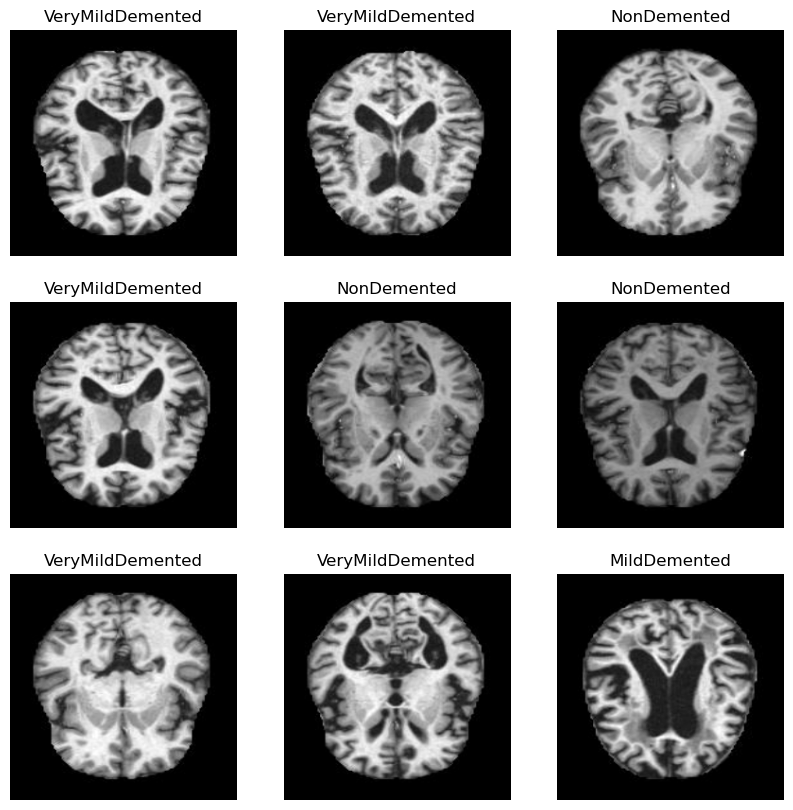

In [29]:
# Plot Sample of the data
plot_sample(al_train_ds)

In [30]:
# Check the shapes of images and lables
for image_batch, labels_batch in al_train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 240, 240, 1)
(32, 4)


---

## Brain Tumor

In [38]:
# The path to the training set
bt_path_train = '../data/brain_tumor/train'
bt_path_test = '../data/brain_tumor/test'

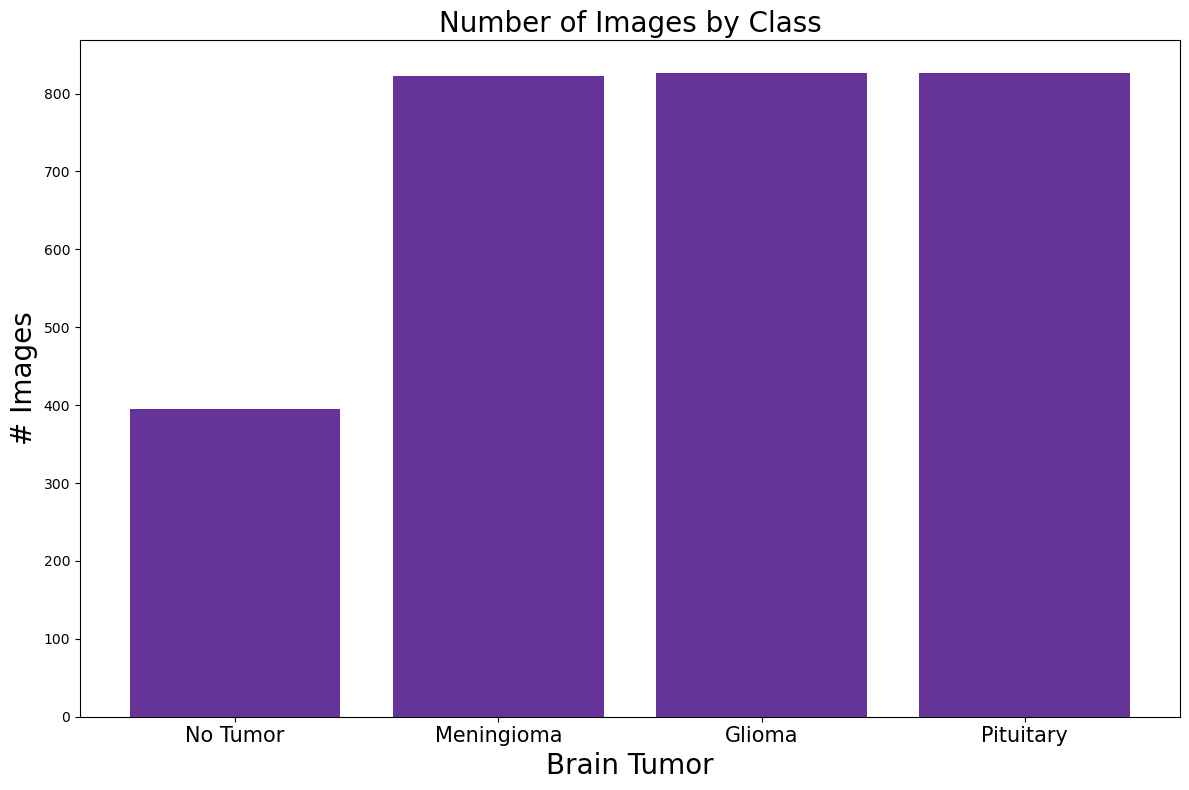

In [41]:
# Make dictionary of the sizes of classes for training data
bt_class_sizes = class_sizes(path = bt_path_train,
                             x_label = "Brain Tumor",
                             x_ticks_list = ['No Tumor', 'Meningioma', 'Glioma', 'Pituitary'])

The Classes of Brain tumors are close in the number of images, however, 'No Tumor' has about half fewer images. 

In [65]:
# Check image sizes
bt_all_sizes = all_im_sizes(bt_path_train)
bt_all_sizes.head()

Average height: 481
Average width: 480


,height,width
0,512,512
1,512,512
2,512,512
3,512,512
4,512,512


The sizes of the images are the same and identical to the Alzheimer's disease images.

In [39]:
# Baseline for Brain Tumor
normalized_dict(bt_class_sizes)

{'no_tumor': 0.14,
 'meningioma_tumor': 0.29,
 'glioma_tumor': 0.29,
 'pituitary_tumor': 0.29}

My Baseline for Brain Tumor is 30% 

In [44]:
# Check distribution of test data
normalized_dict(bt_class_sizes_test)

{'pituitary_tumor': 0.19,
 'glioma_tumor': 0.25,
 'no_tumor': 0.27,
 'meningioma_tumor': 0.29}

Proportions in test set are close to train set proportions

In [32]:
# Sets for models using TensorFlow
bt_train_ds, bt_val_ds = image_dataset_from_directory(
    bt_path_train,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=(image_size, image_size),
    seed=18,
    validation_split=0.2,
    subset = 'both'
)

Found 2871 files belonging to 4 classes.
Using 2297 files for training.
Using 574 files for validation.


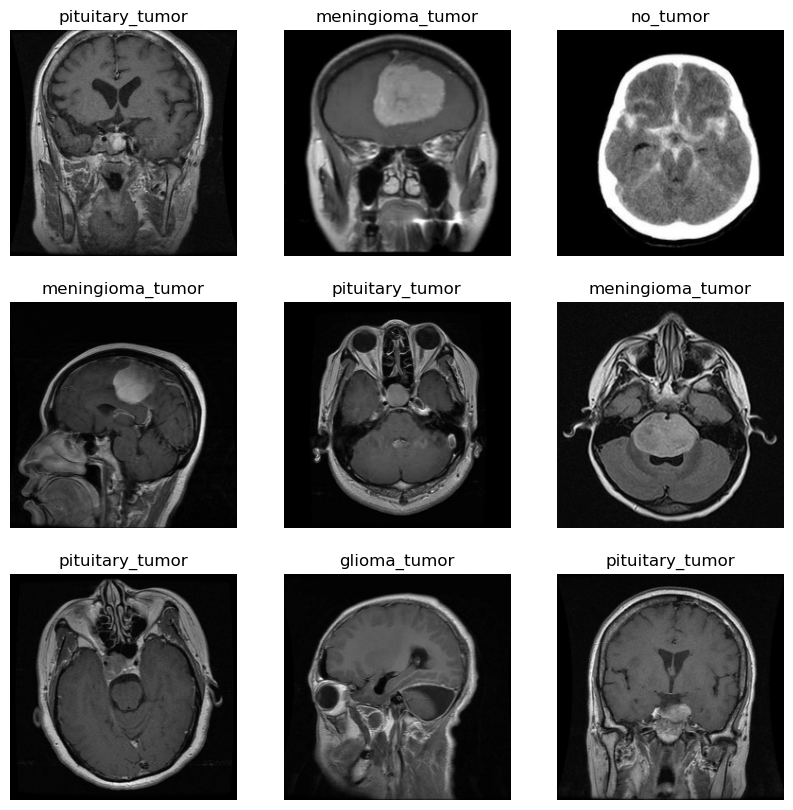

In [33]:
# Plot Sample of the data
plot_sample(bt_train_ds)